Предыдущий файл - 6_inference.py

Сначала исследуем процесс обучения с помощью графика зависимости loss от step

      epoch  grad_norm  learning_rate    loss  step  eval_loss  eval_runtime  \
0  0.017278   0.227356       0.000298  0.3140   500        NaN           NaN   
1  0.034555   0.193255       0.000297  0.2408  1000        NaN           NaN   
2  0.051833   0.174521       0.000295  0.2285  1500        NaN           NaN   
3  0.069111   0.191954       0.000293  0.2203  2000        NaN           NaN   
4  0.086389   0.213088       0.000291  0.2148  2500        NaN           NaN   

   eval_samples_per_second  eval_steps_per_second  
0                      NaN                    NaN  
1                      NaN                    NaN  
2                      NaN                    NaN  
3                      NaN                    NaN  
4                      NaN                    NaN  


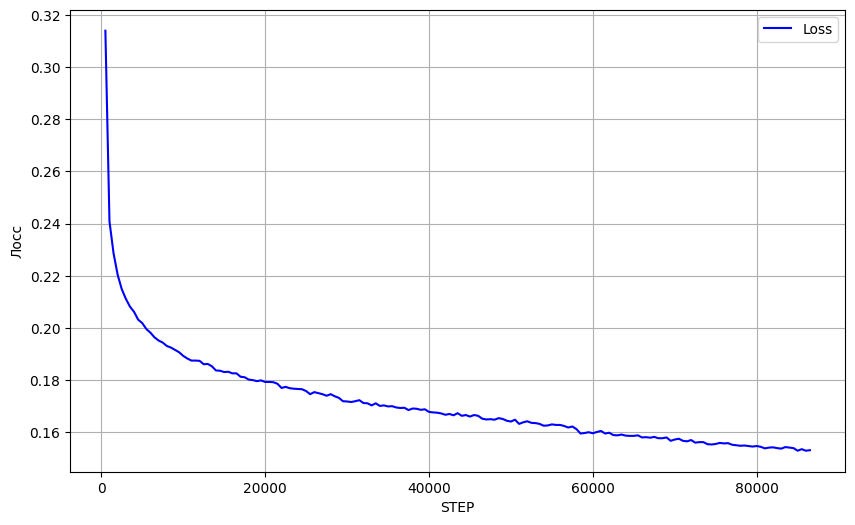

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt


file_path = "trainer_state.json"
with open(file_path, 'r') as file:
    data = json.load(file)


log_history = data['log_history']


df = pd.DataFrame(log_history)
df = df.dropna(subset=['loss'])


print(df.head())


plt.figure(figsize=(10, 6))
plt.plot(df['step'], df['loss'], color='b', label='Loss')
plt.xlabel('STEP')
plt.ylabel('Лосс')
plt.grid(True)
plt.legend()
plt.show()

Судя по графику, дообучение прошло успешно

Теперь посчитаем метрики для нашего полученного датасета с предсказаниями

In [3]:
import pandas as pd

ds = pd.read_csv('inference_results.csv', sep='\t', index_col=0)

Убираем из датасета все реакции, для которых по какой-то причине не получилось предсказать класс выхода

In [4]:
def res(row):
    row = str(row)
    if 'high' in row[-10:]:
        return 1
    elif 'low' in row[-10:]:
        return 0
    else:
        return 'no_answer'
    
ds['prediction'] = ds['prediction'].apply(res)
ds['answer'] = ds['answer'].apply(res)

ds = ds.loc[ds['prediction'] != 'no_answer']

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f"Accuracy: {accuracy_score(ds['answer'].astype(int), ds['prediction'].astype(int)):.3f}")
print(f"Recall: {recall_score(ds['answer'].astype(int), ds['prediction'].astype(int)):.3f}")
print(f"Precision: {precision_score(ds['answer'].astype(int), ds['prediction'].astype(int)):.3f}")
print(f"F1: {f1_score(ds['answer'].astype(int), ds['prediction'].astype(int)):.3f}")


Accuracy: 0.653
Precision: 0.662
Recall: 0.701
F1: 0.681


Таким образом, были получены достойные метрики для первого дообучения модели. В дальнейшем я планирую развить свое исследование. Сейчас я хочу заняться улучшением формата подачи данных в модель, попробовать другие модели и посмотреть, какие метрики получатся. В дальнейшем есть перспективы для предсказания численного выхода реакции.

Это финальный файл в данном проекте.